In [1]:
from shapely.geometry import Point # Use in geospatial environment
import pandas as pd
import geopandas as gpd # Use in geospatial environment
import matplotlib.pyplot as plt
import folium #Use in geospatial environment
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37203,33,NASHVILLE,93532.890729543782,120334624.37817383,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
4,37246,57,NASHVILLE,2247.4521491892065,315078.17651367187,"MULTIPOLYGON (((-86.79052 36.15846, -86.79107 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [4]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             57 non-null     object  
 1   objectid        57 non-null     object  
 2   po_name         57 non-null     object  
 3   shape_stlength  57 non-null     object  
 4   shape_starea    57 non-null     object  
 5   geometry        57 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


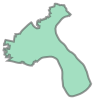

In [5]:
zipcodes.loc[0,'geometry']

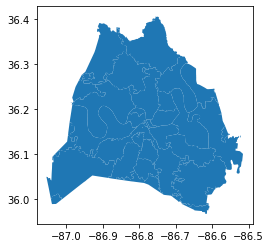

In [6]:
zipcodes.plot();

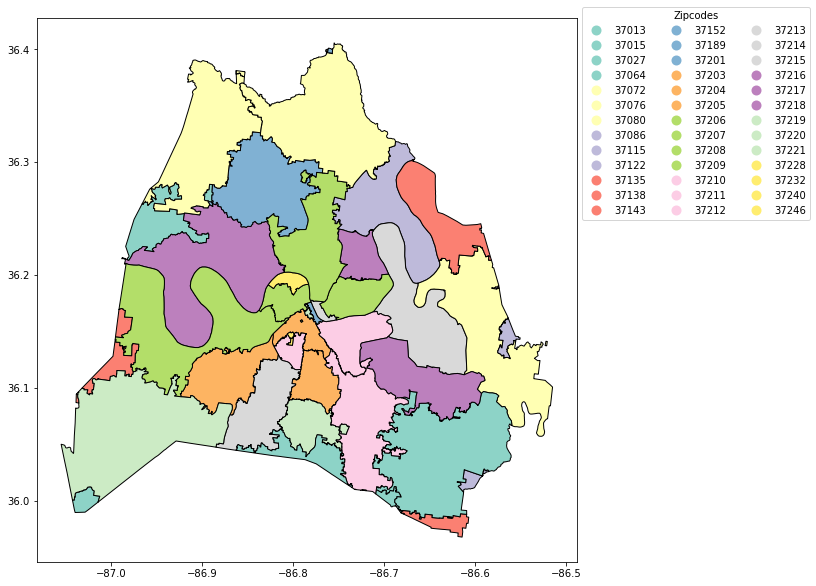

In [7]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [8]:
may_trips_pkl = pd.read_pickle('../data/may_trips.pkl')
print(may_trips_pkl.shape)
may_trips_pkl.head()

(224969, 10)


,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude
0,2019-05-01 00:00:55.423,BRD2134,"[[36.157235,-86.803612],[36.157235,-86.80362],...",Powered9EAJL,3.0000,958.00528,36.15710,36.15660,-86.80360,-86.80670
1,2019-05-01 00:03:33.147,LFT5,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",Powered296631,1.7156,1371.39112,36.15797,36.16054,-86.77896,-86.77689
2,2019-05-01 00:05:55.570,BRD2168,"[[36.155068,-86.782124],[36.156597,-86.78675]]",Powered7S2UU,3.0000,2296.58800,36.15470,36.15650,-86.78180,-86.78680
3,2019-05-01 00:05:55.570,BRD2166,"[[36.149741,-86.779344],[36.149741,-86.779327]...",PoweredZIIVX,3.0000,1200.78744,36.14940,36.15310,-86.77950,-86.77960
4,2019-05-01 00:05:55.570,BRD2165,"[[36.177699,-86.786477],[36.177711,-86.786469]...",PoweredJ7MB3,2.0000,351.04988,36.17780,36.17740,-86.78660,-86.78760


In [9]:
may_trips_pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    224969 non-null  datetime64[ns]
 1   tripRecordNum   224969 non-null  object        
 2   tripRoute       224969 non-null  object        
 3   sumdID          224969 non-null  object        
 4   tripDuration    224969 non-null  float64       
 5   tripDistance    224969 non-null  float64       
 6   startLatitude   224969 non-null  float64       
 7   endLatitude     224969 non-null  float64       
 8   startLongitude  224969 non-null  float64       
 9   endLongitude    224969 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 17.2+ MB


In [10]:
may_trips_pkl.loc[0].startLatitude

36.1571

In [11]:
may_trips_pkl['geometry'] = may_trips_pkl.apply(lambda x: Point((x.startLongitude, x.startLatitude)), 
                                        axis=1)
may_trips_pkl.head(3)

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude,geometry
0,2019-05-01 00:00:55.423,BRD2134,"[[36.157235,-86.803612],[36.157235,-86.80362],...",Powered9EAJL,3.0000,958.00528,36.15710,36.15660,-86.80360,-86.80670,POINT (-86.8036 36.1571)
1,2019-05-01 00:03:33.147,LFT5,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",Powered296631,1.7156,1371.39112,36.15797,36.16054,-86.77896,-86.77689,POINT (-86.77896 36.15797)
2,2019-05-01 00:05:55.570,BRD2168,"[[36.155068,-86.782124],[36.156597,-86.78675]]",Powered7S2UU,3.0000,2296.58800,36.15470,36.15650,-86.78180,-86.78680,POINT (-86.7818 36.1547)


In [12]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
may_scooter_geo = gpd.GeoDataFrame(may_trips_pkl, 
                           crs = zipcodes.crs, 
                           geometry = may_trips_pkl['geometry'])

In [14]:
type(may_trips_pkl)

pandas.core.frame.DataFrame

In [15]:
type(may_scooter_geo)

geopandas.geodataframe.GeoDataFrame

In [16]:
may_scooter_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    224969 non-null  datetime64[ns]
 1   tripRecordNum   224969 non-null  object        
 2   tripRoute       224969 non-null  object        
 3   sumdID          224969 non-null  object        
 4   tripDuration    224969 non-null  float64       
 5   tripDistance    224969 non-null  float64       
 6   startLatitude   224969 non-null  float64       
 7   endLatitude     224969 non-null  float64       
 8   startLongitude  224969 non-null  float64       
 9   endLongitude    224969 non-null  float64       
 10  geometry        224969 non-null  geometry      
dtypes: datetime64[ns](1), float64(6), geometry(1), object(3)
memory usage: 18.9+ MB


In [17]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [18]:
stops_by_zip = gpd.sjoin(may_scooter_geo, zipcodes, op = 'within')

In [19]:
stops_by_zip.head()

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude,geometry,index_right,zip,po_name
0,2019-05-01 00:00:55.423,BRD2134,"[[36.157235,-86.803612],[36.157235,-86.80362],...",Powered9EAJL,3.0000,958.00528,36.15710,36.15660,-86.80360,-86.80670,POINT (-86.80360 36.15710),1,37203,NASHVILLE
1,2019-05-01 00:03:33.147,LFT5,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",Powered296631,1.7156,1371.39112,36.15797,36.16054,-86.77896,-86.77689,POINT (-86.77896 36.15797),1,37203,NASHVILLE
2,2019-05-01 00:05:55.570,BRD2168,"[[36.155068,-86.782124],[36.156597,-86.78675]]",Powered7S2UU,3.0000,2296.58800,36.15470,36.15650,-86.78180,-86.78680,POINT (-86.78180 36.15470),1,37203,NASHVILLE
3,2019-05-01 00:05:55.570,BRD2166,"[[36.149741,-86.779344],[36.149741,-86.779327]...",PoweredZIIVX,3.0000,1200.78744,36.14940,36.15310,-86.77950,-86.77960,POINT (-86.77950 36.14940),1,37203,NASHVILLE
5,2019-05-01 00:05:55.570,BRD2167,"[[36.154368,-86.785909],[36.151689,-86.784331]...",PoweredEJF1K,3.0000,984.25200,36.15440,36.15150,-86.78620,-86.78440,POINT (-86.78620 36.15440),1,37203,NASHVILLE


In [20]:
stops_by_zip['zip'].value_counts()

37203    97397
37201    39847
37219    17858
37212    17020
37204    15713
37206     8866
37208     8725
37213     8710
37210     4870
37240     1605
37232     1379
37207     1086
37209      702
37215      330
37228      243
37216      206
37205      185
37246       99
37211       42
37217       41
37214       15
37013       15
37218        5
37221        5
37115        3
37138        1
37220        1
Name: zip, dtype: int64

In [21]:
stops_in_37215 = stops_by_zip.loc[stops_by_zip['zip'] == '37215']
stops_in_37215.shape

(330, 14)

In [22]:
polygon37215 = zipcodes.loc[zipcodes['zip'] == '37215']
polygon37215.shape

(1, 3)

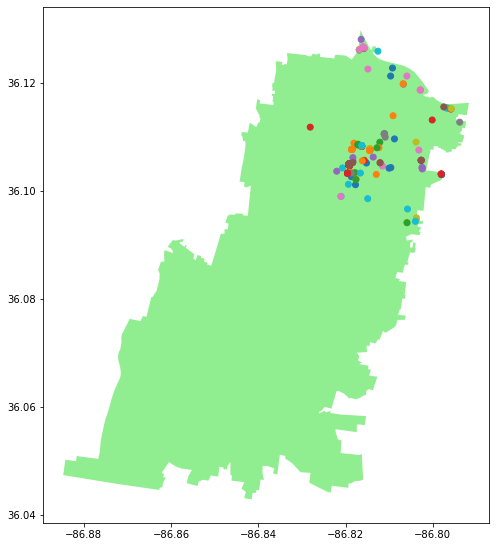

In [23]:
#fig, ax = matplotlib.subplots()
ax = polygon37215.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37215.plot( ax = ax, column = 'sumdID');
plt.show();

In [24]:
polygon37215.geometry.centroid

C:\Users\Joselit\AppData\Local\Temp/ipykernel_9652/3887234197.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37215.geometry.centroid


38    POINT (-86.83435 36.08232)
dtype: geometry

In [25]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37215.geometry.centroid[38]
print(center)

POINT (-86.83434807038049 36.08232096515431)


C:\Users\Joselit\AppData\Local\Temp/ipykernel_9652/958860762.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37215.geometry.centroid[38]


In [26]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.08232096515431, -86.83434807038049]


In [27]:
#create our map of Nashville Zip Code 37207 and show it
map_37215 = folium.Map(location =  area_center, zoom_start = 12)
map_37215

In [28]:
i = 0
for row_index, row_values in stops_in_37215.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 881
values are:
 
pubTimeStamp                             2019-05-01 07:46:23.857000
tripRecordNum                                                LFT504
tripRoute         [[36.1031,-86.79802],[36.10314,-86.79807],[36....
sumdID                                                Powered838800
tripDuration                                               5.826617
tripDistance                                             1742.12604
startLatitude                                               36.1031
endLatitude                                                36.10326
startLongitude                                            -86.79802
endLongitude                                              -86.79821
geometry                         POINT (-86.79801999999999 36.1031)
index_right                                                      38
zip                                                           37215
po_name                                                   NASHVILLE
Name: 881, dtype: obj

In [33]:
#draw our zip code area: 37215
map_37215 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37215).add_to(map_37215)

#iterate through stops_in_37215 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37215.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37215)
#map_37215.save('../maps/map37215.html')

#display our map
map_37215


In [30]:
folium.Map?

In [31]:
cluster_map_37215 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37215)

folium.GeoJson(polygon37215).add_to(cluster_map_37215)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37215.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['tripRoute'])
    icon=folium.Icon(color="blue",icon="bicyle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
#cluster_map_37215.save('../maps/cluster37215.html')

cluster_map_37215  

In [32]:
#draw our zip code area: 37215
map_37215 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37215).add_to(map_37215)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37215[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37215

In [ ]:
cluster_map_37215 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37215)

folium.GeoJson(polygon37215).add_to(cluster_map_37215)
f

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37215.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['tripRoute'])
    icon=folium.Icon(color="blue",icon="bicyle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
#cluster_map_37215.save('../maps/cluster37215.html')

cluster_map_37215  